In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mplsoccer import Pitch, VerticalPitch
from statsbombpy import sb
import json
import ast
import seaborn as sns
jsonDec = json.decoder.JSONDecoder()
sb.competitions()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2021-05-19T08:38:06.515138,2021-05-19T08:38:06.515138
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [2]:
sb.matches(competition_id=16,season_id=24)

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,18240,2013-05-25,20:45:00.000,Europe - Champions League,2012/2013,Borussia Dortmund,Bayern Munich,1,2,available,unscheduled,2020-07-29T05:00,None,7,Final,Wembley Stadium,N. Rizzoli,1.0.3,None,None


In [3]:
events = sb.events(match_id=18245)
events.columns

credentials were not supplied. open data access only


Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_offensive', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist', 'pass_height', '

In [4]:
events = events[['team','type','period','minute','location','shot_end_location','shot_outcome','player']]
events = events.dropna(subset=['shot_outcome'])
events.reset_index(drop=True,inplace=True)
events

,team,type,period,minute,location,shot_end_location,shot_outcome,player
0,Liverpool,Shot,1,2,"[98.1, 52.1]","[102.0, 50.5]",Blocked,Georginio Wijnaldum
1,Liverpool,Shot,1,5,"[96.6, 51.5]","[99.2, 50.4]",Blocked,Mohamed Salah
2,Liverpool,Shot,1,7,"[112.1, 30.6]","[120.0, 25.5, 6.0]",Off T,Roberto Firmino Barbosa de Oliveira
3,Real Madrid,Shot,1,10,"[94.5, 26.9]","[120.0, 49.8, 0.2]",Off T,Marcelo Vieira da Silva Júnior
4,Liverpool,Shot,1,13,"[101.2, 30.6]","[103.3, 31.4]",Blocked,James Philip Milner
5,Liverpool,Shot,1,13,"[104.5, 41.1]","[106.1, 40.9]",Blocked,Mohamed Salah
6,Liverpool,Shot,1,13,"[103.7, 35.9]","[106.2, 36.4]",Blocked,Sadio Mané
7,Real Madrid,Shot,1,14,"[111.7, 58.7]","[120.0, 40.7, 3.8]",Off T,Cristiano Ronaldo dos Santos Aveiro
8,Liverpool,Shot,1,17,"[116.5, 37.1]","[120.0, 35.9, 5.5]",Off T,Virgil van Dijk
9,Liverpool,Shot,1,22,"[105.7, 41.4]","[111.0, 41.0]",Blocked,Roberto Firmino Barbosa de Oliveira


In [5]:
pass_end_loc = events['shot_end_location'].values
pass_start_loc = events['location'].values
startX = []
startY = []
endX = []
endY = []
for i in range(len(events)):
    Final_List = (ast.literal_eval(str(pass_start_loc[i])))
    startX.append(Final_List[0])
    startY.append(Final_List[1])
    Final_List = (ast.literal_eval(str(pass_end_loc[i])))
    endX.append(Final_List[0])
    endY.append(Final_List[1])
events['x'] = startX
events['y'] = startY
events['endX'] = endX
events['endY'] = endY
events

,team,type,period,minute,location,shot_end_location,shot_outcome,player,x,y,endX,endY
0,Liverpool,Shot,1,2,"[98.1, 52.1]","[102.0, 50.5]",Blocked,Georginio Wijnaldum,98.1,52.1,102.0,50.5
1,Liverpool,Shot,1,5,"[96.6, 51.5]","[99.2, 50.4]",Blocked,Mohamed Salah,96.6,51.5,99.2,50.4
2,Liverpool,Shot,1,7,"[112.1, 30.6]","[120.0, 25.5, 6.0]",Off T,Roberto Firmino Barbosa de Oliveira,112.1,30.6,120.0,25.5
3,Real Madrid,Shot,1,10,"[94.5, 26.9]","[120.0, 49.8, 0.2]",Off T,Marcelo Vieira da Silva Júnior,94.5,26.9,120.0,49.8
4,Liverpool,Shot,1,13,"[101.2, 30.6]","[103.3, 31.4]",Blocked,James Philip Milner,101.2,30.6,103.3,31.4
5,Liverpool,Shot,1,13,"[104.5, 41.1]","[106.1, 40.9]",Blocked,Mohamed Salah,104.5,41.1,106.1,40.9
6,Liverpool,Shot,1,13,"[103.7, 35.9]","[106.2, 36.4]",Blocked,Sadio Mané,103.7,35.9,106.2,36.4
7,Real Madrid,Shot,1,14,"[111.7, 58.7]","[120.0, 40.7, 3.8]",Off T,Cristiano Ronaldo dos Santos Aveiro,111.7,58.7,120.0,40.7
8,Liverpool,Shot,1,17,"[116.5, 37.1]","[120.0, 35.9, 5.5]",Off T,Virgil van Dijk,116.5,37.1,120.0,35.9
9,Liverpool,Shot,1,22,"[105.7, 41.4]","[111.0, 41.0]",Blocked,Roberto Firmino Barbosa de Oliveira,105.7,41.4,111.0,41.0


In [6]:
df = events[events['team']=='Liverpool']
# df = df[df['period'] == 1]
df.reset_index(drop=True,inplace=True)
df

,team,type,period,minute,location,shot_end_location,shot_outcome,player,x,y,endX,endY
0,Liverpool,Shot,1,2,"[98.1, 52.1]","[102.0, 50.5]",Blocked,Georginio Wijnaldum,98.1,52.1,102.0,50.5
1,Liverpool,Shot,1,5,"[96.6, 51.5]","[99.2, 50.4]",Blocked,Mohamed Salah,96.6,51.5,99.2,50.4
2,Liverpool,Shot,1,7,"[112.1, 30.6]","[120.0, 25.5, 6.0]",Off T,Roberto Firmino Barbosa de Oliveira,112.1,30.6,120.0,25.5
3,Liverpool,Shot,1,13,"[101.2, 30.6]","[103.3, 31.4]",Blocked,James Philip Milner,101.2,30.6,103.3,31.4
4,Liverpool,Shot,1,13,"[104.5, 41.1]","[106.1, 40.9]",Blocked,Mohamed Salah,104.5,41.1,106.1,40.9
5,Liverpool,Shot,1,13,"[103.7, 35.9]","[106.2, 36.4]",Blocked,Sadio Mané,103.7,35.9,106.2,36.4
6,Liverpool,Shot,1,17,"[116.5, 37.1]","[120.0, 35.9, 5.5]",Off T,Virgil van Dijk,116.5,37.1,120.0,35.9
7,Liverpool,Shot,1,22,"[105.7, 41.4]","[111.0, 41.0]",Blocked,Roberto Firmino Barbosa de Oliveira,105.7,41.4,111.0,41.0
8,Liverpool,Shot,1,22,"[106.4, 55.3]","[116.3, 45.0, 0.2]",Saved,Trent Alexander-Arnold,106.4,55.3,116.3,45.0
9,Liverpool,Shot,2,54,"[110.0, 37.6]","[116.5, 41.8]",Blocked,Dejan Lovren,110.0,37.6,116.5,41.8


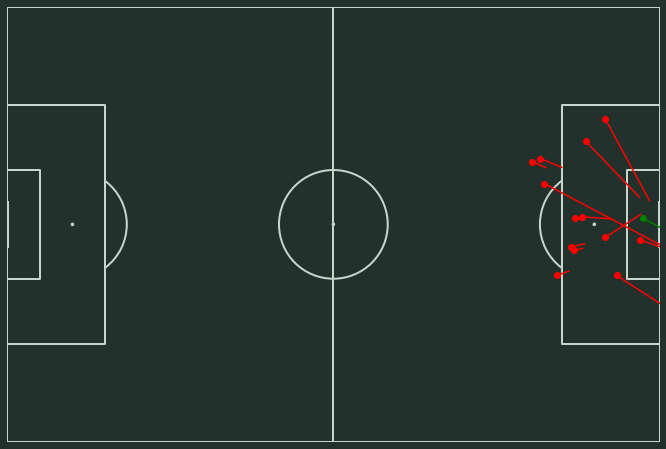

In [7]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)
pitch.draw(ax=ax)
plt.gca().invert_yaxis()
# kde = sns.kdeplot(
#         x=df['x'],
#         y=df['y'],
#         shade = True,
# #         shade_lowest=False,
#         alpha=.5,
#         n_levels=10,
#         cmap = 'magma'
# )
plt.xlim(0,120)
plt.ylim(0,80)
for x in range(len(df['x'])):
    if df['shot_outcome'][x] == 'Goal':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='green')
        plt.scatter(df['x'][x],df['y'][x],color='green')
    else:
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='red')
        plt.scatter(df['x'][x],df['y'][x],color='red')